In [12]:
import seaborn as sns
sns.set_style('darkgrid')

## Probability

Probability is a number between 0 and 1 used to quantify the likelihood that a measurement falls within some set of values.  



> Probability is required when we make measurements in the real world where we don’t know exact values (i.e., when we manufactureactual resistors or transistors, the resistance and transistor parameters do not all have the same value, and those values generallyvary with temperature or frequency of operation). Another example is that we now must assume that analog or digital signals will have noise associated with them (i.e. we no longer get pure sine waves of one frequency). In the real world we no longer have a deterministic system (one that is precisely or exactly defined, strictly true under all circumstances) and must deal with stochastic systems which means that there is a chance or random component in the system.

_From Probabilistic Methods of Signal and System Analysis by G. Cooper and C. McGillem, 1999, 3rdedition._

### Experiments and Events

Some key probability terms:
* an experiment is some action that results in an outcome. 
* A random experiment is one in which the outcome is not known ahead of time. 
* A single performance of an experiment is referred to as a trial. 
* The set of all possible outcomes in any given experiment is called the sample space and it can be discrete (finite number) or continuous (infinite number of outcomes). 

An example of a discrete experiment would be a coin toss, while an example of a continuous experiment would be the value of sine wave at any specific time. 

* An event is referred to as the outcome of a trial (heads or tails, 1 to 6 on die etc.), but we do not know which will occur at any given time. 

We have both elementary events (drawing any one card) andcomposite events (drawing a heart from a full deck –can be any one of 13 elementary events).


### Tossing Coins

If I flip a coin once, it can come up heads (H) or tails (T).

In [13]:
#  This slide should introduce the np.random module and the 
#  labels list and show how we map them
import numpy as np

one_flip = np.random.randint(0, 2)
one_flip

1

Assuming a "fair" coin, we say that the probability of heads (`H`) is 50% or 0.5.  Because the coin flip must come up heads or tails (there's no third option), the probability of tails (`T`) is all the rest of the time, which is 100% - 50% = 50%, or 0.5.

Probability will always add up to 100%, or 1.0.

To make this more "coin-like", we can convert our numeric values into labels through a _mapping_.  In this case, let's say zero is "heads" and one is "tails".

What might that look like in python/jupyter?

In [14]:
#  We can _map_ those values into our problem domain using a 
#  set of labels
coins = ['H', 'T']
coins[one_flip]

'T'

In [15]:
#  We can use list comprehensions to transform a set of trials
[coins[coin] for coin in np.random.randint(0, 2, size=10)]

['T', 'H', 'H', 'T', 'T', 'H', 'T', 'T', 'H', 'T']

Now let's run an experiment of our own.   Everyone have this running?  Good.  

Stand up.

Then generate yourself a random value from `{H, T}`.  If you want to go retro, take out a coin to flip.  ;)

Anyone who got tails, sit down.  Someone please help me out and count the trials.

Let's go again...

### Congratulations!

Tell us:  what was your secret?   How did you beat the odds?

So, if I flip a coin twice, what are my options?   How often do they occur?

Four possibilities:  HH, HT, TH, TT

Each are equally likely.  That is, there are four possible outcomes for _two flips in a row_.  They each occur $\frac{1}{4}$ of the time

Three flips?


    HHH, HHT, HTH, HTT, THH, THT, TTH, TTT

How likely is each of those outcomes?

In [16]:
print("Each outcome happens with equal likelihood, so 1/8 = ", 1.0 / 8)

Each outcome happens with equal likelihood, so 1/8 =  0.125


Note heads on the first flip has _no bearing_ on the second flip's outcome.  That is, the $P(H|H) = P(H)$ and the $P(T|H) = P(H)$.

In statistics we call these _independent_.  


For a binary decision with $k$ trials, the number of permutations will be $2^k$.  For two flips, $2^2 = 4$, for three flips, $2^3 = 8$, etc.

As you might imagine, if we have $p$ possible outcomes, then the number of permutations will be $p^k$ for k trials.  

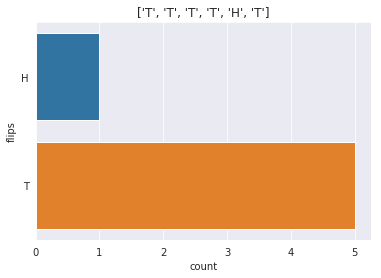

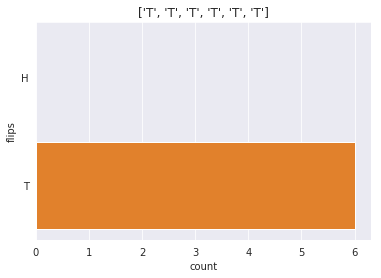

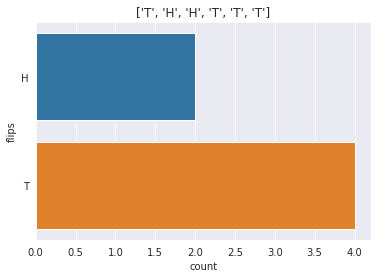

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

coins = ['H', 'T']

#  Note what happens as the number of trials goes _up_
for time in range(3):
    trials = 6
    experiments = [coins[np.random.randint(0,2)] for n in range(trials)]
    df = pd.DataFrame({'flips': experiments})
    
    #  Start a new figure...
    plt.figure()
    ax = sns.countplot(data=df, y='flips', order=coins)
    ax.set_title(str(experiments[0:10]))



### Dependence and Independence

We say that two events, $A$ and $B$ are **dependent** if knowing something about whether $A$ happens gives me a clue as to whether or not $B$ will happen, or vice versa.

Two events are **independent** if no such relationship holds.  For example, if I roll a fair six-sided die, knowing that one roll came up 5 doesn't tell me anything about the following roll.

In probability, we can say that the probability that both events happen is the product of their individual probabilities:

$P(A, B) = P(A)P(B)$

If instead these are dependent on one another, we define _conditional probability_ as:

$P(B | A) = \frac{P(A, B)}{P(A)}$

Note that if A and B are independent, $P(A|B) = P(A)$ since $B$ has no influence over the probability of $A$.

## CDFs and PDFs

Let's say we want to sample a continuous variable (e.g. the resistance of a single resistor).  Since there are a potentially infinite number of choices, we can't simply enumerate them.  Instead we describe this as a _random variable (rv)_.  That is, we select a sample and map it to a real number.  The _rv_ does this mapping.

Let's say that $X$ is a random variable and $x$ is any allowed value of $X$.  The **cumulative distribution function** is defined to be the probability that $X$ is <= a given value $x$.  

Note that because it is a probability, the following hold:
* it's between 0 and 1
* it's value at 0 is `-inf`
* it grows in a non-decreasing manner to +1 at `inf`

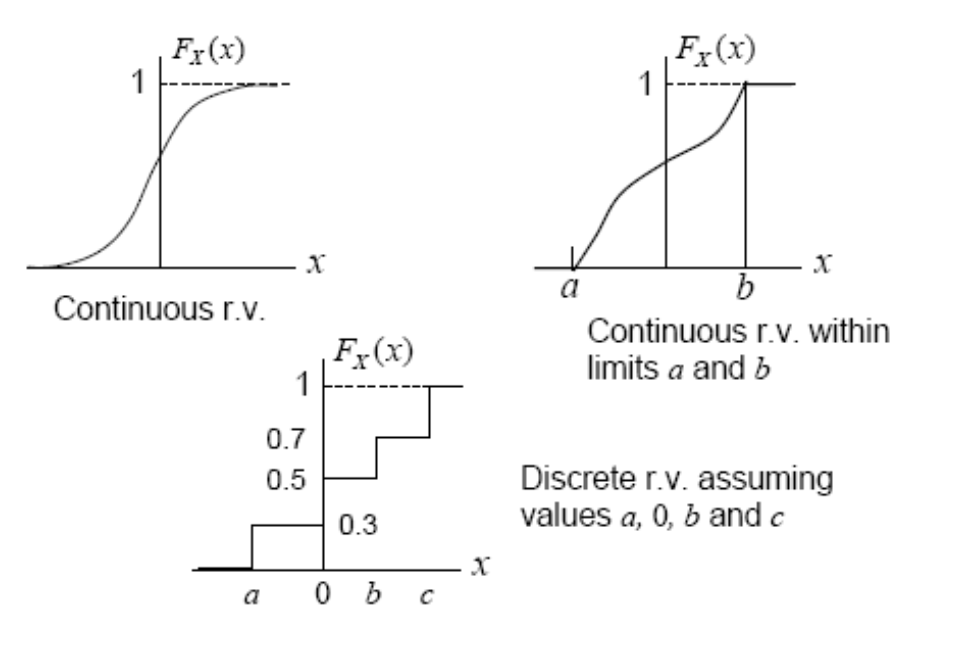

In some cases, this form is not convenient for calculations, so the **probably density function** (or pdf) can be used instead.  

When you think of a bell curve, you are actually thinking about its pdf:

Text(0.5,1,'PDF of a Normal Dist')

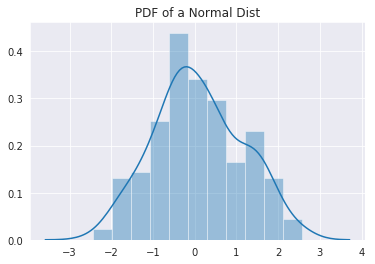

In [24]:
pdf = sns.distplot(np.random.normal(size=200))
pdf.set_title("PDF of a Normal Dist")

We can also view it's CDF by sending in the `cumulative` parameter as true for the histogram and kde parameters:

Text(0.5,1,'CDF of a Normal Dist')

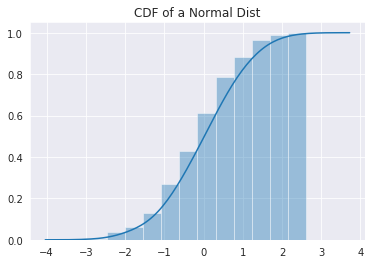

In [25]:
cdf = sns.distplot(np.random.normal(size=200), 
             hist_kws={'cumulative': True}, 
             kde_kws={'cumulative': True})
cdf.set_title("CDF of a Normal Dist")

Similarly, we can view these superimposed by simply adding them to the same figure:

Text(0.5,1,'PDF + CDF (superimposed) - Gaussian Distribution')

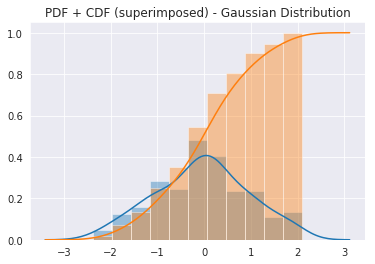

In [26]:
data = np.random.normal(size=200)
mixed = sns.distplot(data)
sns.distplot(data, 
             hist_kws={'cumulative': True}, 
             kde_kws={'cumulative': True})
mixed.set_title("PDF + CDF (superimposed) - Gaussian Distribution")

Another common distribution is the **uniform** distribution, which has equal likelihood across all entries:

Text(0.5,1,'PDF of a Uniform Dist')

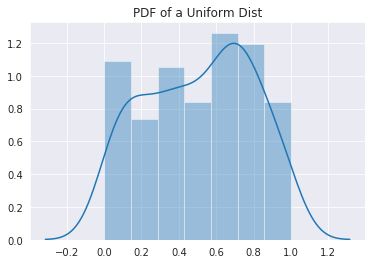

In [27]:
pdf = sns.distplot(np.random.uniform(size=200))
pdf.set_title("PDF of a Uniform Dist")

Text(0.5,1,'CDF of a Uniform Dist')

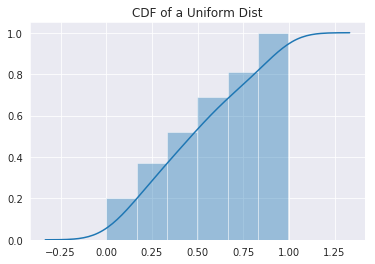

In [28]:
cdf = sns.distplot(np.random.uniform(size=200), 
             hist_kws={'cumulative': True}, 
             kde_kws={'cumulative': True})
cdf.set_title("CDF of a Uniform Dist")

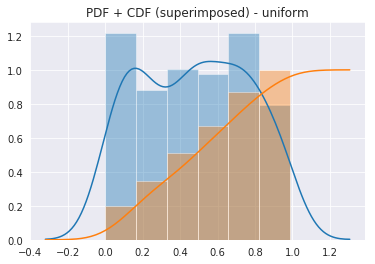

In [41]:
def show_pdf_and_cdf_for(dist, n):
    """Take an arbitrary distribution from np.random and plot its CDF and PDF for a given number of samples, n"""
    data = dist(size=n)
    mixed = sns.distplot(data)
    sns.distplot(data, 
                 hist_kws={'cumulative': True}, 
                 kde_kws={'cumulative': True})
    mixed.set_title("PDF + CDF (superimposed) - %s" % dist.__name__)
    return mixed

show_pdf_and_cdf_for(np.random.uniform, 200)

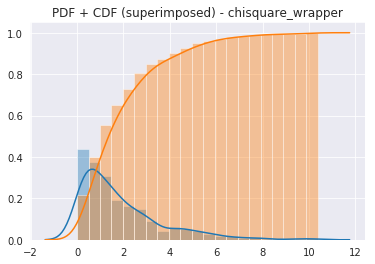

In [42]:
#  Note that we can use other distributions, even if they require parameters.
#
#  We simply create a function that works like the distribution does _once it's been
#  given the required parameters_.
def chisquare_wrapper(*args, **kwargs):
    return np.random.chisquare(2, *args, **kwargs)


show_pdf_and_cdf_for(chisquare_wrapper, 500)

## Bayes' Theorem

If you know the probability of one event
happening given another, you can calculate the
inverse.

   $P(A|B) = \frac{P(B|A) P(A)}{P(B)}$

Given a coin, what's the probability of getting two heads in a row?   $P(H) * P(H) = 0.5 * 0.5 = 0.25$

If we knew in advance that the first coin toss was a head, then what's the probability?  Bayes' Theorem can answer that for us:

$P(HH|H) = \frac{P(H|H) P(H)}{P(H)} = \frac{0.5 * 0.5}{0.5} = 0.5$

## Sampling

Often we want to take a group of examples from a given distribution.  This process is called _sampling_.

In the previous examples, when we call `np.random.normal(size=k)` we are taking $k$ samples from a normal (also called Gaussian) distribution.

We can also sample from a dataset.  For example, we can get a 1/10th sample from a population of 30 with the following code:

In [43]:
import numpy as np
import pandas as pd

population = pd.Series(np.random.normal(size=10))
sample = population.sample(frac=0.3)
population.shape, sample.shape

((10,), (3,))

We can also sample _with replacement_, meaning that when we go to pick the second sample, we put the original samples "back" so that we might get them again a second time.  Run the example below a few times to see if you get the same index values more than once.

In [134]:
population.sample(replace=True, n=5)

1    0.882686
3    1.298836
3    1.298836
7   -0.453853
8    0.759889
dtype: float64

Note that as the fraction of the population goes up, the odds of getting all unique values gets smaller and smaller.